# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [62]:
# Import dependencies
import requests
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint
from citipy import citipy
from IPython.display import display
import seaborn as sns
from datetime import datetime
from pytz import timezone


#Import keys
from api_keys import g_key
from api_keys import weather_api_key

# Range of Latitude and Longitude
lat_range = (-90, 90)
lon_range = (-180, 180)


## Generate Cities List

In [11]:
# Do not run

643

In [39]:
# Cities List

lat_lon=[]
cities=[]

# Random set of Latitude and Longitude / size number must be modify according to confirmed cities
lat = np.random.uniform(lat_range[0], lat_range[1], size = 1400)
lon = np.random.uniform(lon_range[0], lon_range[1], size = 1400)
lat_lon = zip(lat,lon)

# Generate the cities list
for lat_lon in lat_lon:
    c = citipy.nearest_city(lat_lon[0],lat_lon[1]).city_name
    if c not in cities:
        cities.append(c)

# Cities count        
len(cities)


604

In [40]:
# Generate and store the cities list in csv file

cities_list =pd.DataFrame({'City': cities})
cities_list.to_csv('Output_Data/cities.csv', index=False, header=True)

cities_list


,City
0,awjilah
1,nurmijarvi
2,poum
3,ketchikan
4,ushuaia
...,...
599,linda
600,jiwani
601,bandarbeyla
602,tres arroyos


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
# Do not run

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

In [41]:
# Weather check for each city

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

city = []
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
not_found = []

# Record count and set count
rec_count = 0
set_count = 1

# Loop to generate data for data frame
for c in cities:
    try:
        response = requests.get(query_url + c).json()
        city.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print (f'Processing Record {rec_count} of Set {set_count} | City: {c}')
        rec_count = rec_count+1
        if rec_count == 50:
            rec_count = 0
            set_count = set_count+1
    except KeyError:
        print (f'City {c} was not found. Skipping...')
        not_found.append(c)

# Print log        
print ('********************************')
print ('Data Retrieval Complete')
print ('********************************')


Processing Record 0 of Set 1 | City: awjilah
Processing Record 1 of Set 1 | City: nurmijarvi
Processing Record 2 of Set 1 | City: poum
Processing Record 3 of Set 1 | City: ketchikan
Processing Record 4 of Set 1 | City: ushuaia
Processing Record 5 of Set 1 | City: rikitea
Processing Record 6 of Set 1 | City: vaini
Processing Record 7 of Set 1 | City: albany
Processing Record 8 of Set 1 | City: pala
Processing Record 9 of Set 1 | City: chuy
Processing Record 10 of Set 1 | City: kapaa
Processing Record 11 of Set 1 | City: carnarvon
Processing Record 12 of Set 1 | City: jurm
Processing Record 13 of Set 1 | City: kaitangata
Processing Record 14 of Set 1 | City: mataura
Processing Record 15 of Set 1 | City: atuona
Processing Record 16 of Set 1 | City: dikson
Processing Record 17 of Set 1 | City: tasiilaq
Processing Record 18 of Set 1 | City: castro
Processing Record 19 of Set 1 | City: chapais
Processing Record 20 of Set 1 | City: mar del plata
Processing Record 21 of Set 1 | City: rawah
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
# Do not run

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [42]:
# Cities Data Frame

cities_data_df = pd.DataFrame({'City':city, "Lat":lat, 'Lon':lon, "Max Temp":max_temp, 'Humidity':humidity, 'Cloudiness':cloudiness, 'Wind Speed':wind_speed,
                              'Country':country, 'Date':date})
cities_data_df


,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Awjilah,29.1081,21.2869,35.38,8,0,4.75,LY,1622047220
1,Nurmijärvi,60.4641,24.8073,7.98,91,75,1.79,FI,1622047220
2,Poum,-20.2333,164.0167,22.00,60,38,5.17,NC,1622047220
3,Ketchikan,55.3422,-131.6461,8.26,81,90,1.54,US,1622047221
4,Ushuaia,-54.8000,-68.3000,-1.19,100,75,10.29,AR,1622046978
...,...,...,...,...,...,...,...,...,...
547,Linda,39.1277,-121.5508,22.61,43,1,1.54,US,1622047375
548,Jiwani,25.0500,61.7417,32.22,65,0,5.75,PK,1622047375
549,Bandarbeyla,9.4942,50.8122,26.56,80,42,12.42,SO,1622047375
550,Tres Arroyos,-38.3739,-60.2798,18.47,46,97,8.28,AR,1622047376


In [43]:
# Find duplicates

duplicates = cities_data_df.loc[cities_data_df.duplicated(subset=['City','Lat'], keep=False),cities_data_df.columns]
duplicates


,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [31]:
# Drop duplicates (if any)

# cities_data_df = cities_data_df.drop_duplicates()




In [44]:
# Export city data to csv file
cities_data_df.to_csv('Output_Data/cities_data.csv', index=False, header=True)


In [45]:
# Cities data Statistics
cities_data_df.describe()


,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,5.520000e+02
mean,18.014517,18.279592,19.486793,65.010870,51.836957,3.657862,1.622047e+09
std,32.831482,88.667398,9.898610,23.522856,37.887007,2.507052,9.473080e+01
min,-54.800000,-175.200000,-8.980000,1.000000,0.000000,0.000000,1.622047e+09
25%,-8.964025,-58.387075,12.350000,50.750000,14.500000,1.787500,1.622047e+09
50%,20.350400,20.225700,21.135000,70.000000,50.000000,3.090000,1.622047e+09
75%,45.472250,92.925000,27.065000,83.250000,90.000000,5.057500,1.622047e+09
max,78.218600,179.316700,43.800000,100.000000,100.000000,16.710000,1.622047e+09


In [16]:
# Do not run

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [46]:
# Remove cities with humidity > 100 %

max_hum = cities_data_df['Humidity'].max()
max_hum


100

In [47]:
if max_hum<=100:
    print("There are no cities with humidity higher than 100 % in this dataset.")
else:
    print(max_hum)


There are no cities with humidity higher than 100 % in this dataset.


In [6]:
# Do not run

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.

# Do not run

Int64Index([], dtype='int64')

In [48]:
#  Get the indices of cities that have humidity over 100%.

print("There are no cities with humidity higher than 100 % in this dataset.")


There are no cities with humidity higher than 100 % in this dataset.


In [19]:
# Do not run

# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [49]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

q1 = np.quantile(cities_data_df['Humidity'],0.25)
q2 = np.quantile(cities_data_df['Humidity'],0.50)
q3 = np.quantile(cities_data_df['Humidity'],0.75)
iqr = q3 - q1
lowb = q1 - 1.5*iqr
upb = q3 + 1.5*iqr
outliers = []
count = 0

# Finding the outliers

# outliers = cities_data_df.loc[(cities_data_df < lowb)|(cities_data_df > upb)]

for index, row in cities_data_df.iterrows():
    if row['Humidity']<lowb or row['Humidity']>upb:
        count = count + 1
        outliers.append(row['Humidity'])

print(f'There are {count} outliers in the original dataset')
print(f'Those outliers are: {outliers}')


There are 1 outliers in the original dataset
Those outliers are: [1]


In [52]:
# Clean City Data dataframe

clean_city_data = cities_data_df.drop(cities_data_df[(cities_data_df['Humidity']<lowb) | (cities_data_df['Humidity']>upb)].index, inplace=False)
clean_city_data


,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Awjilah,29.1081,21.2869,35.38,8,0,4.75,LY,1622047220
1,Nurmijärvi,60.4641,24.8073,7.98,91,75,1.79,FI,1622047220
2,Poum,-20.2333,164.0167,22.00,60,38,5.17,NC,1622047220
3,Ketchikan,55.3422,-131.6461,8.26,81,90,1.54,US,1622047221
4,Ushuaia,-54.8000,-68.3000,-1.19,100,75,10.29,AR,1622046978
...,...,...,...,...,...,...,...,...,...
547,Linda,39.1277,-121.5508,22.61,43,1,1.54,US,1622047375
548,Jiwani,25.0500,61.7417,32.22,65,0,5.75,PK,1622047375
549,Bandarbeyla,9.4942,50.8122,26.56,80,42,12.42,SO,1622047375
550,Tres Arroyos,-38.3739,-60.2798,18.47,46,97,8.28,AR,1622047376


In [53]:
# Export clean city data to csv file

clean_city_data.to_csv('Output_Data/clean_city_data.csv', index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

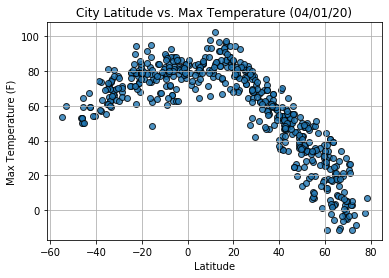

In [10]:
# Do not run

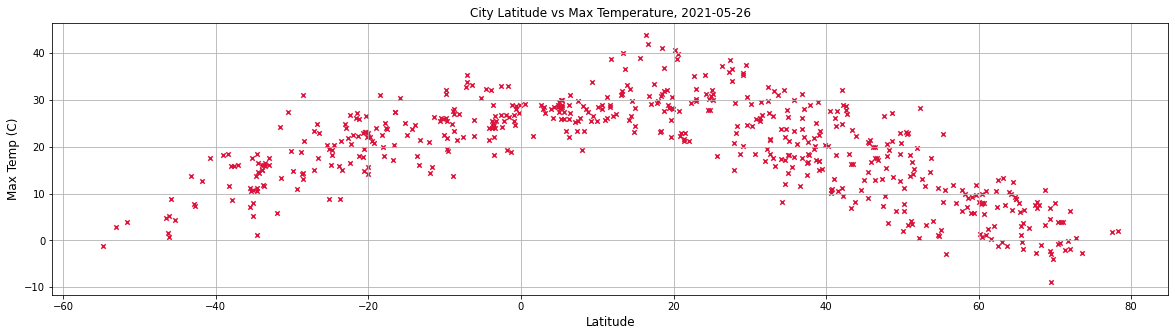

In [57]:
# Scatter Plot

ax = plt.gca()

clean_city_data.plot(kind = 'scatter', x = 'Lat', y ='Max Temp', ax = ax, marker = 'x', color = "crimson", figsize = (20,5), grid=True)
date = datetime.utcfromtimestamp(int(clean_city_data['Date'][0])).strftime('%Y-%m-%d')
plt.title(f'City Latitude vs Max Temperature, {date}', fontsize = 12,)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Max Temp (C)', fontsize = 12)
plt.savefig('Images/Latitude_vs_Max_Temp.png')
plt.savefig('Images/Latitude_vs_Max_Temp.jpg')
plt.show()


## Latitude vs. Humidity Plot

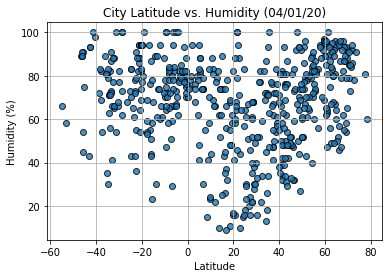

In [11]:
# Do not run

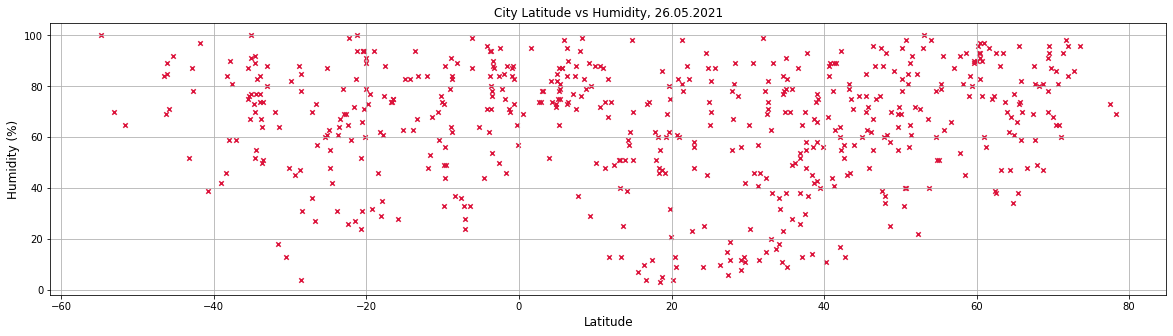

In [58]:
# Scatter Plot

ax = plt.gca()

clean_city_data.plot(kind = 'scatter', x = 'Lat', y ='Humidity', ax = ax, marker = 'x', color = "crimson", figsize = (20,5), grid=True)
date = datetime.utcfromtimestamp(int(clean_city_data['Date'][0])).strftime('%d.%m.%Y')
plt.title(f'City Latitude vs Humidity, {date}', fontsize = 12,)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Humidity (%)', fontsize = 12)
plt.savefig('Images/Latitude_vs_Humidity.png')
plt.savefig('Images/Latitude_vs_Humidity.jpg')
plt.show()

## Latitude vs. Cloudiness Plot

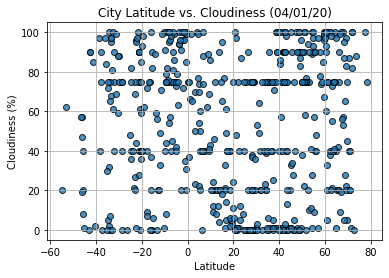

In [12]:
# Do not run

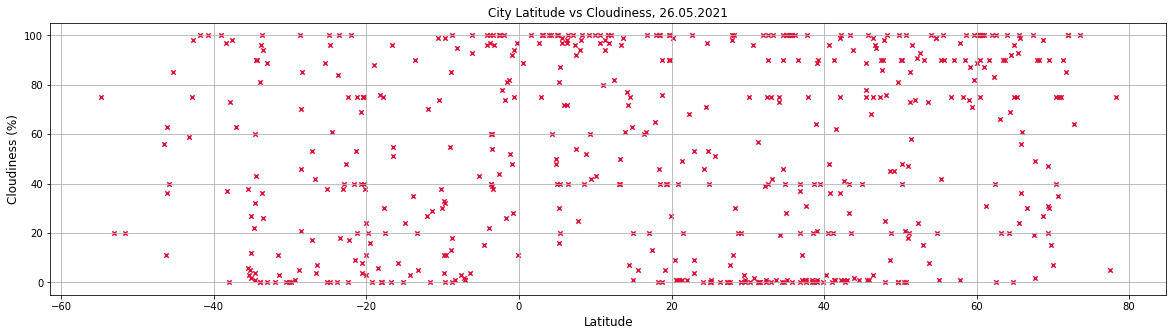

In [59]:
# Scatter Plot

ax = plt.gca()

clean_city_data.plot(kind = 'scatter', x = 'Lat', y ='Cloudiness', ax = ax, marker = 'x', color = "crimson", figsize = (20,5), grid=True)
date = datetime.utcfromtimestamp(int(clean_city_data['Date'][0])).strftime('%d.%m.%Y')
plt.title(f'City Latitude vs Cloudiness, {date}', fontsize = 12,)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Cloudiness (%)', fontsize = 12)
plt.savefig('Images/Latitude_vs_Cloudiness.png')
plt.savefig('Images/Latitude_vs_Cloudiness.jpg')
plt.show()

## Latitude vs. Wind Speed Plot

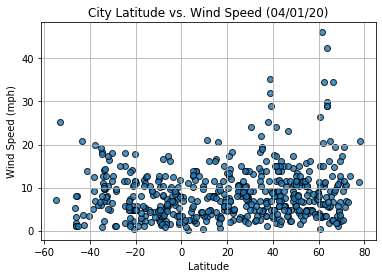

In [13]:
# Do not run

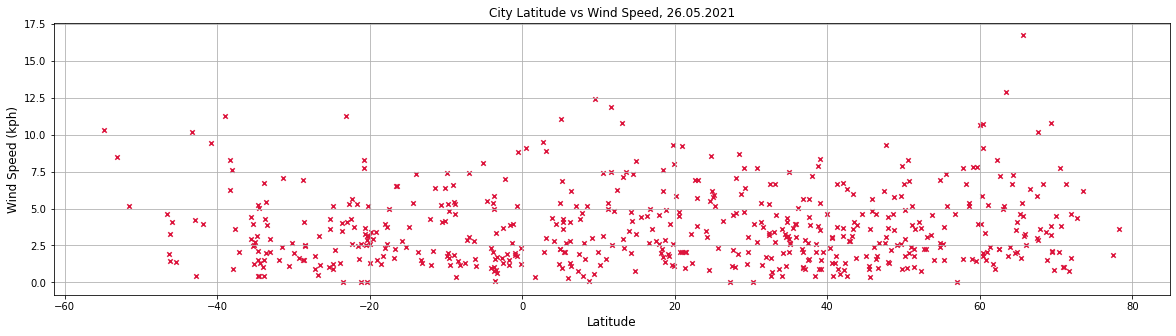

In [60]:
# Scatter Plot

ax = plt.gca()

clean_city_data.plot(kind = 'scatter', x = 'Lat', y ='Wind Speed', ax = ax, marker = 'x', color = "crimson", figsize = (20,5), grid=True)
date = datetime.utcfromtimestamp(int(clean_city_data['Date'][0])).strftime('%d.%m.%Y')
plt.title(f'City Latitude vs Wind Speed, {date}', fontsize = 12,)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Wind Speed (kph)', fontsize = 12)
plt.savefig('Images/Latitude_vs_Wind_Speed.png')
plt.savefig('Images/Latitude_vs_Wind_Speed.jpg')
plt.show()

## Linear Regression

In [80]:
# Linear Regression

def linear_regression (x_axis,y_axis,x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    fig,ax=plt.subplots()
    ax.scatter(x_axis,y_axis,color="mediumseagreen",marker='x')
    ax.plot(x_axis,regress_values,"crimson")
    ax.annotate(line_eq,(x,y),fontsize=10,color="crimson")
    ax.annotate(f'r^2= {round(rvalue**2,2)}',(x,y-5),fontsize=10,color="crimson")

# Hemispheres    
North = clean_city_data.loc[clean_city_data['Lat']>0,:]
South = clean_city_data.loc[clean_city_data['Lat']<0,:]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


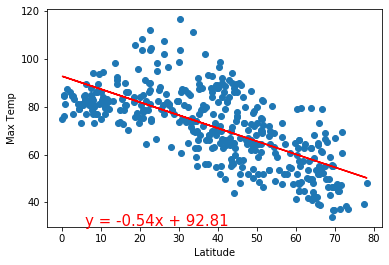

In [25]:
# Do not run

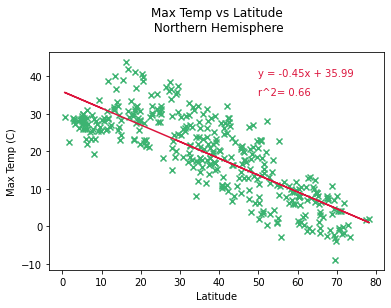

In [78]:
# Scatter Plot with Linear Regression

linear_regression(North['Lat'],North['Max Temp'],50,40)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title('Max Temp vs Latitude\n Northern Hemisphere\n')
plt.savefig('Images/Max_Temp_vs_Latitude_North_Hemisphere.png')
plt.savefig('Images/Max_Temp_vs_Latitude_North_Hemisphere.jpg')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


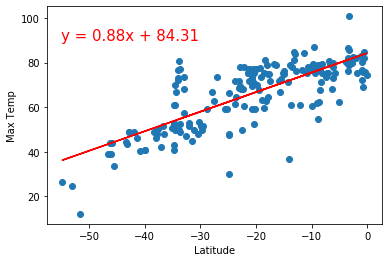

In [26]:
# Do not run

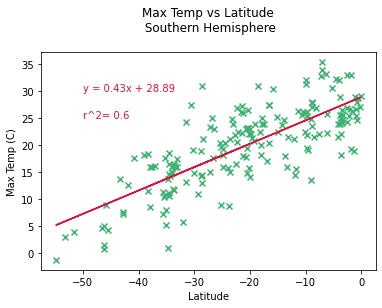

In [83]:
# Scatter Plot with Linear Regression

linear_regression(South['Lat'],South['Max Temp'],-50,30)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title('Max Temp vs Latitude\n Southern Hemisphere\n')
plt.savefig('Images/Max_Temp_vs_Latitude_South_Hemisphere.png')
plt.savefig('Images/Max_Temp_vs_Latitude_South_Hemisphere.jpg')
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


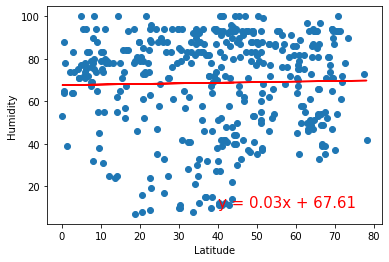

In [27]:
# Do not run

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


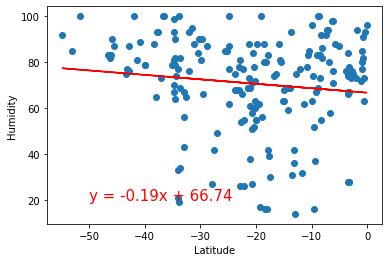

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


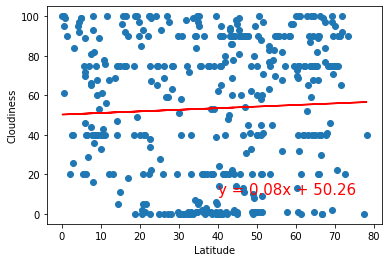

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


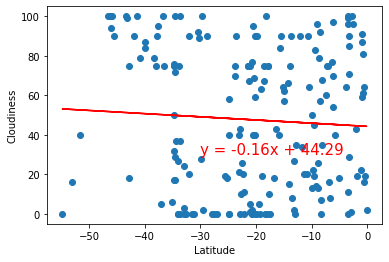

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


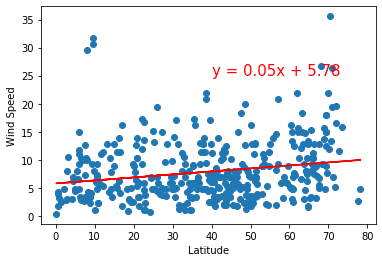

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


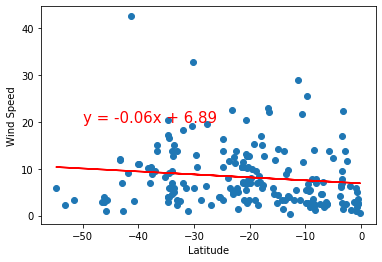